In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime
import time

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ff0ac872ee548d4e465ee0a26b2803c2


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | avarua
Processing Record 2 of Set 1 | namibe
Processing Record 3 of Set 1 | raga
City not found. Skipping...
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | faanui
Processing Record 6 of Set 1 | poum
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | samusu
City not found. Skipping...
Processing Record 9 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 10 of Set 1 | maswa
Processing Record 11 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | douglas
Processing Record 15 of Set 1 | leningradskiy
Processing Record 16 of Set 1 | zaraza
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | yomitan
City not found. Skipping...
Processing Record 19 of Set 1 | tiksi
Processing Record 20 of Set 1 | cam ranh
Proc

Processing Record 37 of Set 4 | kaupanger
Processing Record 38 of Set 4 | chokurdakh
Processing Record 39 of Set 4 | iqaluit
Processing Record 40 of Set 4 | jinchang
Processing Record 41 of Set 4 | saint-pierre
Processing Record 42 of Set 4 | melito di porto salvo
Processing Record 43 of Set 4 | orsta
Processing Record 44 of Set 4 | jiuquan
Processing Record 45 of Set 4 | port macquarie
Processing Record 46 of Set 4 | grand river south east
City not found. Skipping...
Processing Record 47 of Set 4 | gorontalo
Processing Record 48 of Set 4 | kahului
Processing Record 49 of Set 4 | marzuq
Processing Record 50 of Set 4 | grindavik
Processing Record 1 of Set 5 | svolvaer
Processing Record 2 of Set 5 | caravelas
Processing Record 3 of Set 5 | bikaner
Processing Record 4 of Set 5 | ulaangom
Processing Record 5 of Set 5 | sarkand
Processing Record 6 of Set 5 | vrangel
Processing Record 7 of Set 5 | clyde river
Processing Record 8 of Set 5 | road town
Processing Record 9 of Set 5 | fairbanks
P

Processing Record 19 of Set 8 | portland
Processing Record 20 of Set 8 | nordhausen
Processing Record 21 of Set 8 | ucluelet
Processing Record 22 of Set 8 | quatre cocos
Processing Record 23 of Set 8 | aripuana
Processing Record 24 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 25 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 26 of Set 8 | vasai
Processing Record 27 of Set 8 | maghama
City not found. Skipping...
Processing Record 28 of Set 8 | mayumba
Processing Record 29 of Set 8 | havelock
Processing Record 30 of Set 8 | banjar
Processing Record 31 of Set 8 | madaoua
Processing Record 32 of Set 8 | bekhtery
Processing Record 33 of Set 8 | takaka
Processing Record 34 of Set 8 | muswellbrook
Processing Record 35 of Set 8 | port elizabeth
Processing Record 36 of Set 8 | umm lajj
Processing Record 37 of Set 8 | inhapim
Processing Record 38 of Set 8 | syracuse
Processing Record 39 of Set 8 | awjilah
Processing Record 40 of Set 8 | esmeraldas

Processing Record 4 of Set 12 | natitingou
Processing Record 5 of Set 12 | albanel
Processing Record 6 of Set 12 | san matias
Processing Record 7 of Set 12 | leopoldina
Processing Record 8 of Set 12 | bayan
Processing Record 9 of Set 12 | smirnykh
Processing Record 10 of Set 12 | lebedinyy
Processing Record 11 of Set 12 | dongfeng
Processing Record 12 of Set 12 | genova
Processing Record 13 of Set 12 | ishigaki
Processing Record 14 of Set 12 | krasnoselkup
City not found. Skipping...
Processing Record 15 of Set 12 | hohhot
Processing Record 16 of Set 12 | tulua
Processing Record 17 of Set 12 | yerofey pavlovich
Processing Record 18 of Set 12 | belmonte
Processing Record 19 of Set 12 | povenets
Processing Record 20 of Set 12 | edgewater
Processing Record 21 of Set 12 | dingle
Processing Record 22 of Set 12 | jacareacanga
Processing Record 23 of Set 12 | puerto cabezas
Processing Record 24 of Set 12 | ilulissat
Processing Record 25 of Set 12 | comodoro rivadavia
Processing Record 26 of S

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Avarua,-21.21,-159.78,77.00,73,94,11.41,CK,2019-11-07 20:21:23
1,Namibe,-15.19,12.15,73.45,84,100,3.20,AO,2019-11-07 20:21:23
2,New Norfolk,-42.78,147.06,44.60,70,75,6.93,AU,2019-11-07 20:21:23
3,Faanui,-16.48,-151.75,80.91,78,28,20.02,PF,2019-11-07 20:21:24
4,Poum,41.28,20.71,51.80,81,90,3.36,MK,2019-11-07 20:21:24
5,Cape Town,-33.93,18.42,61.00,77,20,8.05,ZA,2019-11-07 20:18:11
6,Maswa,-3.18,33.77,71.85,70,87,7.61,TZ,2019-11-07 20:21:25
7,Port Alfred,-33.59,26.89,63.00,78,7,7.00,ZA,2019-11-07 20:21:25
8,Vaini,15.34,74.49,65.32,97,37,2.89,IN,2019-11-07 20:21:26
9,Douglas,58.28,-134.39,42.80,93,90,2.53,US,2019-11-07 20:21:26


In [7]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 
                    'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Avarua,CK,2019-11-07 20:21:23,-21.21,-159.78,77.00,73,94,11.41
1,Namibe,AO,2019-11-07 20:21:23,-15.19,12.15,73.45,84,100,3.20
2,New Norfolk,AU,2019-11-07 20:21:23,-42.78,147.06,44.60,70,75,6.93
3,Faanui,PF,2019-11-07 20:21:24,-16.48,-151.75,80.91,78,28,20.02
4,Poum,MK,2019-11-07 20:21:24,41.28,20.71,51.80,81,90,3.36


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Analysis

In [9]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

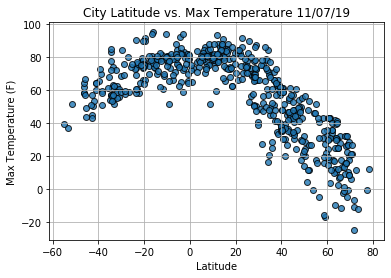

In [10]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

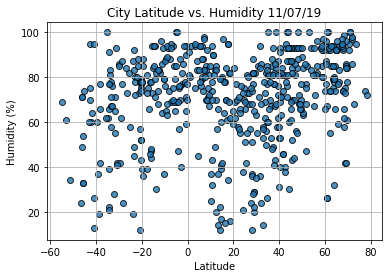

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

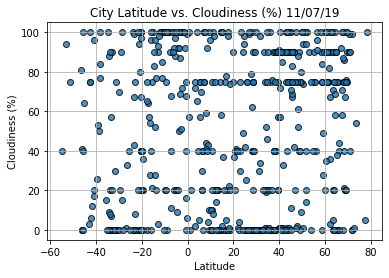

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

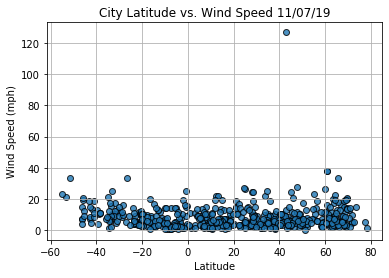

In [13]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

### Linear Regression

In [27]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [15]:
index13 = city_data_df.loc[13]
index13

City                        Tiksi
Country                        RU
Date          2019-11-07 20:21:27
Lat                         71.64
Lng                        128.87
Max Temp                    -6.87
Humidity                       97
Cloudiness                     99
Wind Speed                   4.54
Name: 13, dtype: object

In [16]:
# Filter for Norther Hemisphere latitudes
city_data_df["Lat"] >= 0

0      False
1      False
2      False
3      False
4       True
       ...  
538     True
539     True
540     True
541     True
542     True
Name: Lat, Length: 543, dtype: bool

In [17]:
# DataFrame with data fitting the criteria of latitude >= 0
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Poum,MK,2019-11-07 20:21:24,41.28,20.71,51.80,81,90,3.36
8,Vaini,IN,2019-11-07 20:21:26,15.34,74.49,65.32,97,37,2.89
9,Douglas,US,2019-11-07 20:21:26,58.28,-134.39,42.80,93,90,2.53
10,Leningradskiy,RU,2019-11-07 20:21:26,69.38,178.42,19.96,86,76,19.93
11,Zaraza,VE,2019-11-07 20:21:26,9.35,-65.33,81.09,81,10,5.28


In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

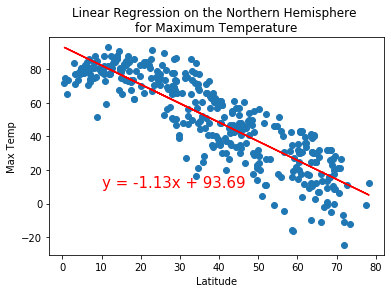

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,10))

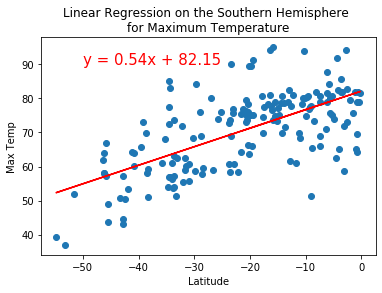

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

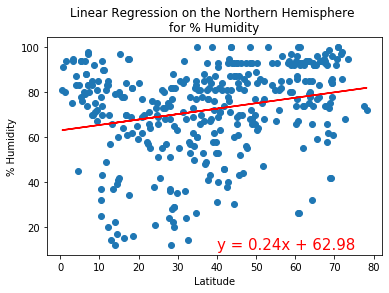

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

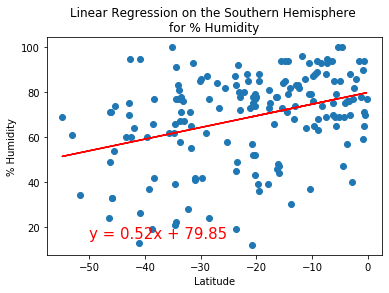

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

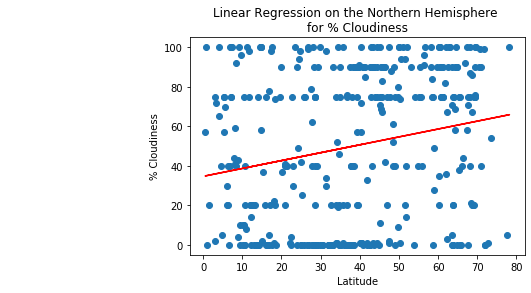

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

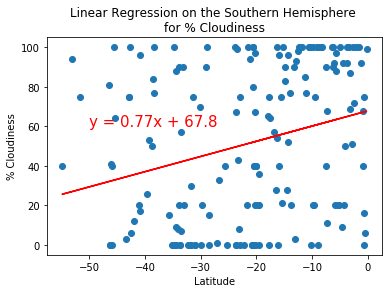

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

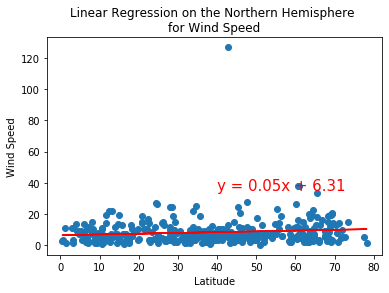

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

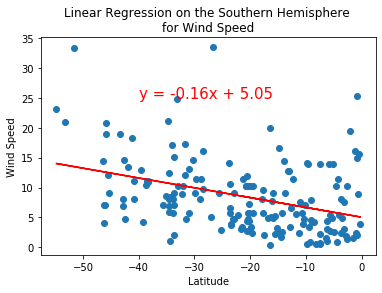

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-40,25))